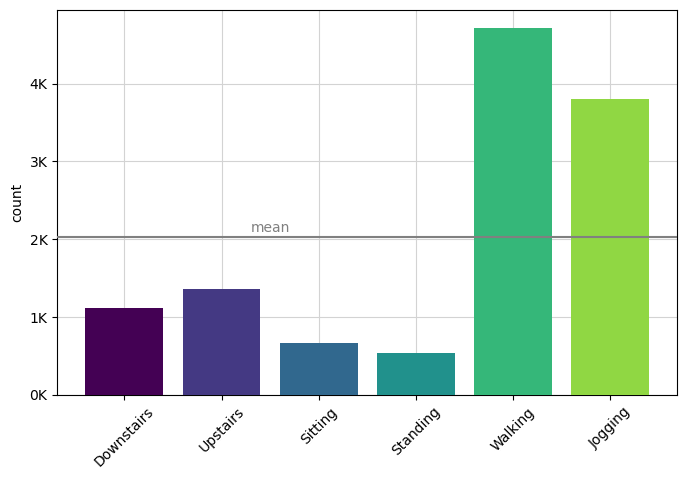

In [146]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
df = pd.read_csv("actitracker_raw.txt", delimiter=",", names=["user_id","class","timestamp","x","y","z"], usecols=["user_id","class","timestamp"])
sort = {'Downstairs': 0, 'Upstairs': 1, 'Sitting': 2, 'Standing': 3, 'Walking': 4, 'Jogging': 5} 
df = df.sort_values(by=['class'], key=lambda x: x.map(sort))['class'].value_counts(sort=False).reset_index()
df.columns=["class","count"]
fig, ax = plt.subplots(figsize=(8, 5))
df["count"] = df["count"].map(lambda x: int(x/90))
# Loop through the DataFrame and plot each bar with a color from the Viridis colormap
for i, row in df.iterrows():
    ax.bar(row['class'], row['count'], color=viridis(i / len(df)), zorder=10)
# df.plot.bar(x='class', y='count', ax=ax, color=viridis_colors, legend=None, zorder=10)    
plt.axhline(df["count"].mean(), color="gray", zorder=20)
# plt.annotate("mean", [1.3,190000], color="gray")
plt.annotate("mean", [1.3,2100], color="gray")
plt.grid(True, which="both", color="lightgray", zorder=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y/1000) + 'K'))
plt.ylabel("count")
plt.xticks(rotation=45)
plt.savefig("data_distribution.png", bbox_inches='tight')

In [ ]:
# import pandas as pd
# import matplotlib.ticker as ticker
# import matplotlib.pyplot as plt
# from matplotlib.cm import viridis
# df = pd.read_csv("actitracker_raw.txt", delimiter=",", names=["user_id","class","timestamp","x","y","z"])
# def plot_sample(sample):
#     sample = np.transpose(sample.detach().numpy())
#     plt.imshow(sample, aspect='auto')
#     plt.show()

# fig, ax = plt.subplots(figsize=(8, 5))
# df.plot.bar(x='class', y='count', ax=ax, color=viridis_colors, legend=None, zorder=10)    
# plt.axhline(df["count"].mean(), color="gray", zorder=20)
# plt.annotate("mean", [1.3,190000], color="gray")
# plt.grid(True, which="both", color="lightgray", zorder=0)
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y/1000) + 'K'))
# plt.ylabel("count")
# plt.xticks(rotation=45)
# plt.savefig("data_distribution.png", bbox_inches='tight')

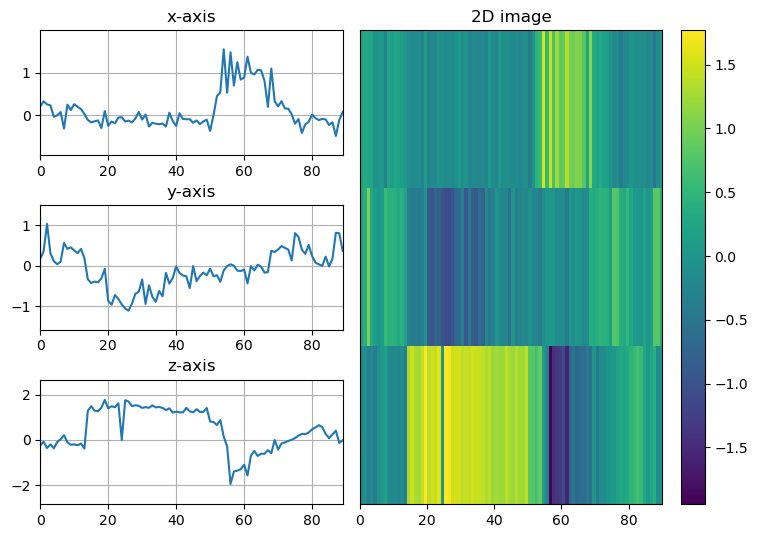

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and labels
data = np.load('trainData.npy')
labels = np.load('trainLabels.npy')

# Find the index of the first occurrence of class 0
index = np.where(np.argmax(labels, axis=1) == 0)[0][0]

# Extract the corresponding sample
sample = data[index][:,:,0]

# Create a DataFrame from the sample
df = pd.DataFrame(sample, columns=['x-axis', 'y-axis', 'z-axis'])

# Define the plotAxis function
def plotAxis(axis, x, y, title):
    axis.plot(x, y)
    axis.set_title(title)
    axis.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    axis.set_xlim([min(x), max(x)])
    axis.grid(True)

# Define the plotActivity function
def plotActivity(data):
    fig = plt.figure(figsize=(9, 6))
    gs = fig.add_gridspec(3, 2, width_ratios=[4,5])  # 3 rows, 2 columns
    ax00 = fig.add_subplot(gs[0, 0])
    plotAxis(ax00, data.index, data['x-axis'], 'x-axis')
    ax10 = fig.add_subplot(gs[1, 0])
    plotAxis(ax10, data.index, data['y-axis'], 'y-axis')
    ax20 = fig.add_subplot(gs[2, 0])
    plotAxis(ax20, data.index, data['z-axis'], 'z-axis')
    ax2 = fig.add_subplot(gs[:, 1])
    # ax2.imshow(np.transpose(data), aspect='auto', extent=[0, len(data), 0, 1], legend=True)
    im = ax2.imshow(np.transpose(data), aspect='auto', extent=[0, len(data), 0, 1])
    ax2.set_title('2D image')
    ax2.set_aspect('auto')
    ax2.yaxis.set_visible(False)
    plt.colorbar(im, ax=ax2)
    ax2.set_title('2D image')
    ax2.set_aspect('auto')
    ax2.yaxis.set_visible(False)
    plt.subplots_adjust(hspace=0.4, wspace=0.05)
    plt.subplots_adjust(top=0.9)
    plt.savefig("data_representations.png", bbox_inches='tight', dpi=100)
    
# Call the plotActivity function
plotActivity(df)

In [16]:
sample.detach()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [19]:
def plot_sample(sample):
    sample = np.transpose(sample)
    plt.imshow(sample, aspect='auto')
    plt.show()

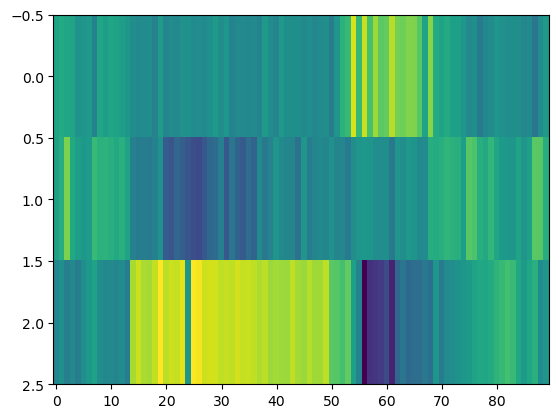

In [20]:
plot_sample(sample)